# Recreating figure 4 from McClintock+ (2018)

In this notebook I will show you how to use the emulator to recreate figure 4 from the [McClintock et al. (2018)](http://adsabs.harvard.edu/abs/2018arXiv180405866M), or at least part of it. In this directory I have dumped a measured mass function from one of the test simulations. We will load it in, along with the cosmology, and try to predict the HMF.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import hmf

In [3]:
e = hmf.hmf_emulator()

In [4]:
#Create a cosmology dictionary and set the cosmology in the emulator
cosmology={
    "omega_b":   0.02326,
    "omega_cdm": 0.1078,
    "w0":        -0.7265,
    "n_s":       0.9805,
    "ln10As":    3.039,
    "H0":        63.23,
    "N_eff":     2.95
}
e.set_cosmology(cosmology)

In [5]:
#A function that takes in a box and snapshot number, opens it up and spits it out in a good format
def get_data(box, snap):
    path  = "./data_for_notebooks/TestBox%03d_Z%d.txt"%(box, snap)
    cpath = "./data_for_notebooks/TestBox%03d_Z%d_cov.txt"%(box, snap)
    logMlo, logMhi, N, Mmean = np.genfromtxt(path, unpack=True)
    M_edges = 10**np.append(logMlo, logMhi[-1])
    err = np.sqrt(np.loadtxt(cpath).diagonal())
    return M_edges, N, Mmean, err

In [6]:
#Info about the data we are using
box = 0
snaps = [2, 9]
redshifts = [1, 0]
volume = 1050.**3 #Mpc/h ^3

In [7]:
#A function that takes in a figure and axis and plots the data on it
def add_data_to_plot(fig, ax, box, snap, c='k'):
    M_edges, N, Mmean, err = get_data(box, snap)
    print(Mmean.shape, N.shape, err.shape)
    ax.errorbar(Mmean, N, err, ls='', marker='.', color=c)
    ax.loglog()
    return

In [8]:
#A function that takes in the box and snapshot and computes the theory curve from the emulator
def compute_theory(box, snap):
    M_edges, N, Mmean, err = get_data(box, snap)
    z = redshifts[snaps.index(snap)]
    N_in_bins = e.n_in_bins(M_edges, z) * volume
    return N_in_bins

In [9]:
#A function that takes in a box and snapshot, adds the theory curve to the axis
def add_theory_to_plot(fig, ax, box, snap, c='k'):
    M_edges, N, Mmean, err = get_data(box, snap)
    N_in_bins = compute_theory(box, snap)
    ax.loglog(Mmean, N_in_bins, ls="-", color=c)
    return

In [10]:
#Compute percent difference at add to axis
def add_percent_diff_to_plot(fig, ax, box, snap, c='k'):
    M_edges, N, Mmean, err = get_data(box, snap)
    N_in_bins = compute_theory(box, snap)
    percent_diff     = 100*(N-N_in_bins)/N_in_bins
    percent_diff_err = 100*err/N_in_bins
    ax.errorbar(Mmean, percent_diff, percent_diff_err, ls='', marker='.', color=c)
    yl = 7
    ax.set_ylim(-yl, yl)
    return

((10,), (10,), (10,))
((13,), (13,), (13,))


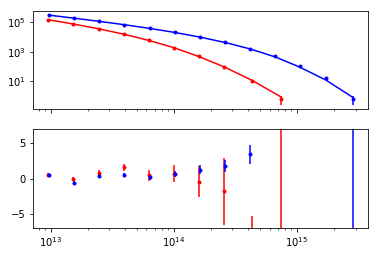

In [11]:
fig, axes = plt.subplots(ncols=1, nrows=2, sharex=True)
cs = ['r', 'b']
for i,snap in enumerate(snaps):
    add_data_to_plot(fig, axes[0], box, snap, c=cs[i])
    add_theory_to_plot(fig, axes[0], box, snap, c=cs[i])
    add_percent_diff_to_plot(fig, axes[1], box, snap, c=cs[i])

Everything looks good the "large disagreement" at high masses is due to the insane shot noise on the halos. For instance, shot noise with 10 halos is +-3, which is much larger than the measured JK errorbars. Thus, the emulator seems to work fine.